## 第四章 神经网络的学习

### 4.2 损失函数 loss function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

#### 4.2.1 均方误差 Mean Squared Error(MSE):
$$E = \frac{1}{2}\sum\limits_{k}(y_k - t_k)^2$$

In [2]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t)**2)

In [3]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
t_label = [2]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

mse = mean_squared_error(np.array(y), np.array(t))
print(mse)

0.09750000000000003


In [4]:
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

mse = mean_squared_error(np.array(y2), np.array(t))
print(mse)

0.5975


#### 4.2.2 交叉熵误差 Cross Entropy Error: 
$$E = -\sum\limits_{k}t_k log y_k$$

In [5]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [6]:
print(-np.log(0.1))
print(-np.log(0.5))
print(-np.log(0.9))

2.3025850929940455
0.6931471805599453
0.10536051565782628


In [7]:
print(cross_entropy_error(np.array(y), np.array(t)))
print(cross_entropy_error(np.array(y2), np.array(t)))

0.510825457099338
2.302584092994546


#### 4.2.3 mini-batch 学习

In [8]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [9]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(batch_mask)
print(x_batch)
print(t_batch)

[18207 40666 14683 51503 15275 43417  1983 18471 10179  3779]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


#### 4.2.4 mini-batch 版交叉熵误差的实现: 
$$E = -\frac{1}{N}\sum\limits_n\sum\limits_kt_{nk}logy_{nk}$$

In [10]:
def cross_entropy_error_one_hot(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [11]:
cross_entropy_error_one_hot(np.array(y), np.array(t))

np.float64(0.510825457099338)

In [12]:
def cross_entropy_error_label(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [13]:
cross_entropy_error_label(np.array(y), np.array(t_label))

np.float64(0.510825457099338)

##### !!解释上面最后一行代码：监督数据是标签形式（非 one-hot 表示，而是像“2”“7”这样的标签）

In [14]:
# 首先强调下，这是numpy数组的专属操作，普通列表[[1,2], [3,4], ...]无法如此操作
yy = np.array([
    [0.1, 0.2, 0.6, 0.05, 0.05],  # 对类别2预测概率0.6
    [0.7, 0.1, 0.1, 0.05, 0.05],  # 对类别0预测概率0.7
    [0.1, 0.1, 0.2, 0.5, 0.1]     # 对类别3预测概率0.5
])
t_one_hot = np.array([
    [0, 0, 1, 0, 0],  # 标签2
    [1, 0, 0, 0, 0],  # 标签0
    [0, 0, 0, 1, 0]   # 标签3
])
t_labels = np.array([2, 0, 3])  # 同样的数据，用标签形式表示，直接存储正确类别的索引

batch_size = yy.shape[0]
indices = np.arange(batch_size)  # [0, 1, 2]
print("样本索引:", indices)      # [0, 1, 2]
print("真实标签:", t_labels)     # [2, 0, 3]

selected_probs = yy[indices, t_labels]
print("选中的概率:", selected_probs)  # [0.6, 0.7, 0.5]
# 相当于：
# y[0, 2] → 第0个样本，第2个类别的概率 = 0.6
# y[1, 0] → 第1个样本，第0个类别的概率 = 0.7
# y[2, 3] → 第2个样本，第3个类别的概率 = 0.5


def cross_entropy_one_hot(y, t):
    return -np.sum(t * np.log(y + 1e-7)) / len(t)


def cross_entropy_label(y, t):
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


result1 = cross_entropy_one_hot(yy, t_one_hot)
result2 = cross_entropy_label(yy, t_labels)
print(result1)      # 0.5202157462469678
print(result2)      # 0.5202157462469678

样本索引: [0 1 2]
真实标签: [2 0 3]
选中的概率: [0.6 0.7 0.5]
0.5202157462469678
0.5202157462469678


### 4.3 数值微分

#### 4.3.1 导数：表示的是某个瞬间的变化量
$$\frac{df(x)}{dx} = \lim\limits_{h\to0}\frac{f(x+h)-f(x)}{h}$$

In [15]:
# 向前差分
def numerical_diff_forward(f, x):
    h = 1e-4
    return (f(x+h) - f(x)) / h

# 中心差分
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [16]:
# 例子函数
def function_1(x):
    return 0.01 * x**2 + 0.1 * x

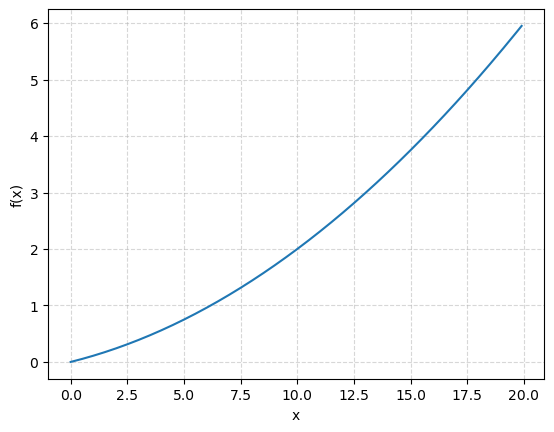

In [17]:
# 画出函数图像
x = np.arange(0, 20, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [18]:
# 求导
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


求f(x)在x=5处导数的值：0.1999999999990898
求f(x)在x=10处导数的值：0.2999999999986347


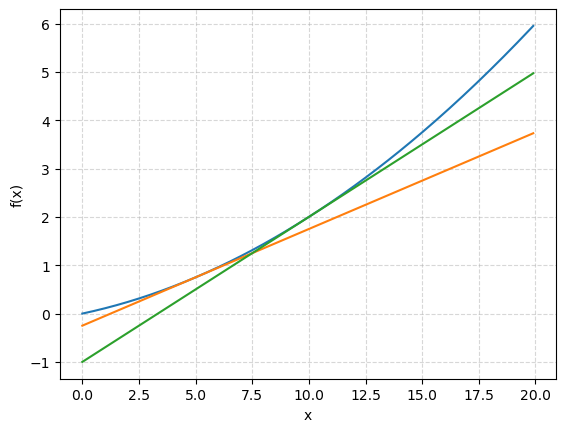

In [19]:
# x = 5, x = 10 处的切线：直线的斜率使用数值微分的值
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(f'求f(x)在x={x}处导数的值：{d}')
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

tf = tangent_line(function_1, 10)
y3 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### 4.3.3 偏导数：有多个变量的函数的导数 $f(x_0, x_1) = x_0^2 + x_1^2$

In [20]:
def function_2(x):
    # return x[0]**2 + x[1]**2
    return np.sum(x**2)

# x[0] = 3, x[1] = 4, 关于x[0]的偏导数
def function_tmp1(x0):
    return x0**2 + 4**2

# x[0] = 3, x[1] = 4, 关于x[1]的偏导数
def function_tmp2(x1):
    return 3**2 + x1**2

print(numerical_diff(function_tmp1, 3))
print(numerical_diff(function_tmp2, 4))

6.00000000000378
7.999999999999119


### 4.4 梯度 Gradient: 由全部变量的偏导数汇总而成的向量 $(\frac{∂f}{∂x_0}, \frac{∂f}{∂x_1}, \frac{∂f}{∂x_2},...)$

In [21]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)    # f(x+h)
        x[idx] = tmp_val - h
        fxh2 = f(x)    # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val    # 还原值
    return grad

In [22]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [23]:
numerical_gradient(function_2, np.array([3.0, 4.0, 5.0, 10]))

array([ 6.,  8., 10., 20.])

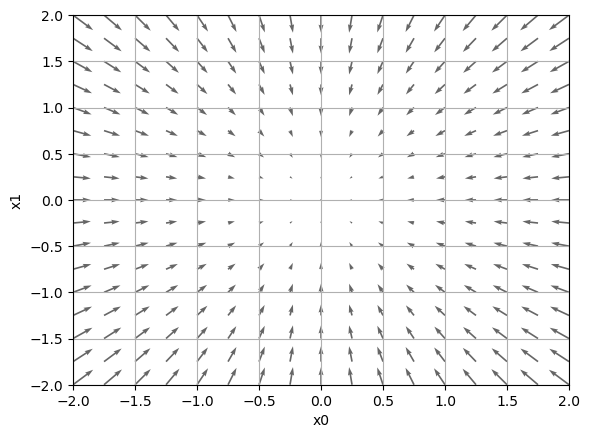

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 还原值
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

#### 4.4.1 梯度下降法
$$x_0 = x_0 - η\frac{∂f}{∂x_0}$$
$$x_1 = x_1 - η\frac{∂f}{∂x_1}$$

In [25]:
# 每次更新x之后，都重新计算当前的x梯度; 根据梯度和学习率，更新X的值 x = x - (lr * grad)
def gradient_descent(f, x, lr=0.01, step_num=100):
    for i in range(step_num): 
        grad = numerical_gradient(f, x)
        x -= lr * grad
        if i % 10 == 0:
            print(f'Grad-{i}: {grad}')
            print(f'XXXX-{i}: {x} \n')
    return x

In [26]:
gradient_descent(function_2, np.array([-3.0, 4.0]), 0.1)

Grad-0: [-6.  8.]
XXXX-0: [-2.4  3.2] 

Grad-10: [-0.64424509  0.85899346]
XXXX-10: [-0.25769804  0.34359738] 

Grad-20: [-0.06917529  0.09223372]
XXXX-20: [-0.02767012  0.03689349] 

Grad-30: [-0.00742764  0.00990352]
XXXX-30: [-0.00297106  0.00396141] 

Grad-40: [-0.00079754  0.00106338]
XXXX-40: [-0.00031901  0.00042535] 

Grad-50: [-8.56348616e-05  1.14179815e-04]
XXXX-50: [-3.42539446e-05  4.56719262e-05] 

Grad-60: [-9.19497325e-06  1.22599643e-05]
XXXX-60: [-3.67798930e-06  4.90398573e-06] 

Grad-70: [-9.87302734e-07  1.31640365e-06]
XXXX-70: [-3.94921094e-07  5.26561458e-07] 

Grad-80: [-1.06010824e-07  1.41347765e-07]
XXXX-80: [-4.24043296e-08  5.65391061e-08] 

Grad-90: [-1.13828255e-08  1.51771007e-08]
XXXX-90: [-4.55313022e-09  6.07084029e-09] 



array([-6.11110793e-10,  8.14814391e-10])

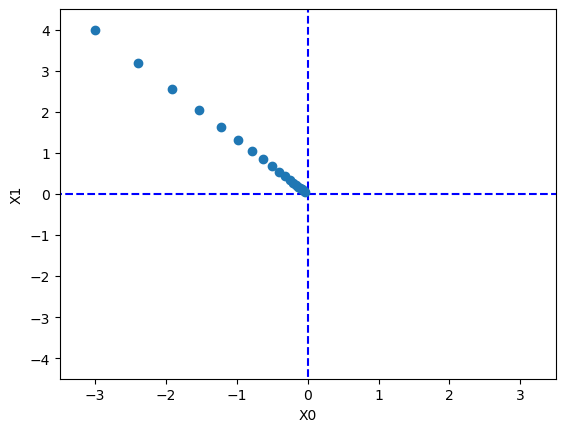

In [27]:
def gradient_descent_show(f, x, lr=0.01, step_num=100):
    x_history = []
    for i in range(step_num):
        x_history.append( x.copy() )
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x, np.array(x_history)

x, x_history = gradient_descent_show(function_2, np.array([-3.0, 4.0]), lr=0.1, step_num=20)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

#### 4.4.2 神经网络的梯度: 损失函数L关于权重参数W的梯度 $\frac{∂L}{∂W}$
$W = \begin{pmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \end{pmatrix}$ , 
$\frac{∂L}{∂W} = \begin{pmatrix} \frac{∂L}{∂w_{11}} & \frac{∂L}{∂w_{12}} & \frac{∂L}{∂w_{13}} \\ \frac{∂L}{∂w_{21}} & \frac{∂L}{∂w_{22}} & \frac{∂L}{∂w_{23}} \end{pmatrix}$

In [51]:
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.33910902  0.14019717 -0.47930619]
 [ 0.50866354  0.21029575 -0.71895929]]


### 4.5 学习算法的实现

- 前提: 神经网络存在合适的权重和偏置，调整权重和偏置以便拟合训练数据的过程称为“学习”。神经网络的学习分成下面 4 个步骤。
- SGD: 随机梯度下降法 (Stochastic Gradient Descent)
1. mini-batch: 从训练数据中随机选出一部分数据，这部分数据称为 mini-batch, 目标是减小 mini-batch 的损失函数的值。
2. 计算梯度: 为了减小 mini-batch 的**损失函数**的值，需要求出各个权重参数的梯度。梯度表示损失函数的值**减小最多**的方向。
3. 更新参数: 将权重参数沿梯度方向进行微小更新。
4. 重复步骤 1、步骤 2、步骤 3。

#### 4.5.1 两层神经网络的类

In [55]:
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    # 初始化权重
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y==t) / x.shape[0]
        return accuracy
        
    def loss(self, x, t):
        y = self.predict(x)
        loss = cross_entropy_error(y, t)
        return loss

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads

In [57]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

In [58]:
print(net.params['W1'].shape)
print(net.params['W2'].shape)
print(net.params['b1'].shape)
print(net.params['b2'].shape)

(784, 100)
(100, 10)
(100,)
(10,)


In [79]:
x = np.random.rand(100, 784) # 伪输入数据（ 100笔）
t = np.random.rand(100, 10) # 伪正确解标签（ 100笔）
y = net.predict(x)

In [80]:
y.shape

(100, 10)

In [81]:
grads = net.numerical_gradient(x, t) # 计算梯度 - 耗时

In [85]:
# 因为梯度是 损失函数对各个参数求导的汇总，所以耗时，计算各个参数相对于损失函数的梯度
# 且形状跟每个参数一样，有多少个参数，就有多少个对应的梯度数值（根据数值微分计算各个参数的梯度）
print(grads['W1'].shape)
print(grads['W2'].shape)
print(grads['b1'].shape)
print(grads['b2'].shape)

(784, 100)
(100, 10)
(100,)
(10,)
